In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max.columns',None)
plt.style.use('fivethirtyeight')

In [30]:
data = pd.read_csv('F:/Okanagan College/3rd Semester/DSCI 401/Project/Final Data.csv')
data['Date'] = pd.to_datetime(data['Date'])

## Rename

In [31]:
data.rename(columns={'DATE': 'Date','Adj.Close':'SP500','WTISPLC..crude.oil..':'OIL','PERMIT..Units..000s':'PERMITS','CPIAUCNS':'CPI','PPIACO':'PPI'}, inplace=True)
data.tail()

,Date,M2V,UNRATE,CPI,PPI,FEDFUNDS,SP500,GOLD,OIL,PERMITS,Cluster,DXY
473,2024-06-01,1.385,4.1,314.175,255.914,5.33,5460.479980,2352.1,79.77,1454,1,105.870003
474,2024-07-01,1.389,4.3,314.540,257.326,5.33,5522.299805,2326.3,81.80,1406,1,104.099998
475,2024-08-01,1.389,4.2,314.796,255.394,5.33,5648.399902,2395.3,76.68,1470,1,101.699997
476,2024-09-01,1.389,4.1,315.301,252.737,5.13,5762.479980,2468.0,70.24,1425,1,100.779999
477,2024-10-01,1.389,4.1,315.664,253.452,4.83,5705.450195,2567.1,71.99,1419,1,103.980003


## First Difference

In [32]:
first_diffs = data['SP500'].values[1:] - data['SP500'].values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])
data['FirstDifference'] = first_diffs

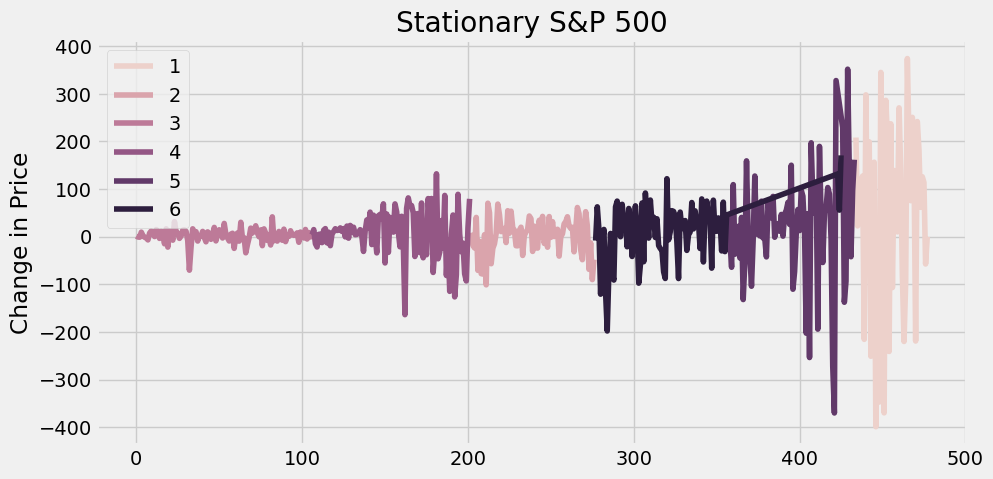

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Stationary S&P 500')
sns.lineplot(data=data, x=data.index, y='FirstDifference', hue='Cluster')
plt.ylabel('Change in Price')

plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.show()

## Subsetting Different Phases Based On Clusters

In [34]:
phase_1 = data[data['Cluster']==1].reset_index(drop=True)
phase_1 = phase_1.drop(columns='Cluster',axis=1)

phase_2 = data[data['Cluster']==2].reset_index(drop=True)
phase_2 = phase_2.drop(columns='Cluster',axis=1)

phase_3 = data[data['Cluster']==3].reset_index(drop=True)
phase_3 = phase_3.drop(columns='Cluster',axis=1)

phase_4 = data[data['Cluster']==4].reset_index(drop=True)
phase_4 = phase_4.drop(columns='Cluster',axis=1)

phase_5 = data[data['Cluster']==5].reset_index(drop=True)
phase_5 = phase_5.drop(columns='Cluster',axis=1)

phase_6 = data[data['Cluster']==6].reset_index(drop=True)
phase_6 = phase_6.drop(columns='Cluster',axis=1)

In [163]:
datasets = [phase_1, phase_2, phase_3, phase_4, phase_5, phase_6]

i=1
for x in datasets:
    print(f'Phase {i} Mean: {x.SP500.mean()}')
    print(f'Phase {i} Std: {x.SP500.std()}')
    i=i+1

Phase 1 Mean: 4505.272705068182
Phase 1 Std: 550.622871120827
Phase 2 Mean: 1184.0263940546665
Phase 2 Std: 189.1365529688897
Phase 3 Mean: 318.7554709990566
Phase 3 Std: 81.29431989539988
Phase 4 Mean: 933.6120818458334
Phase 4 Std: 352.4023389472756
Phase 5 Mean: 2578.4877154324327
Phase 5 Std: 494.34155616854997
Phase 6 Mean: 1400.4174650132531
Phase 6 Std: 437.84225758861453


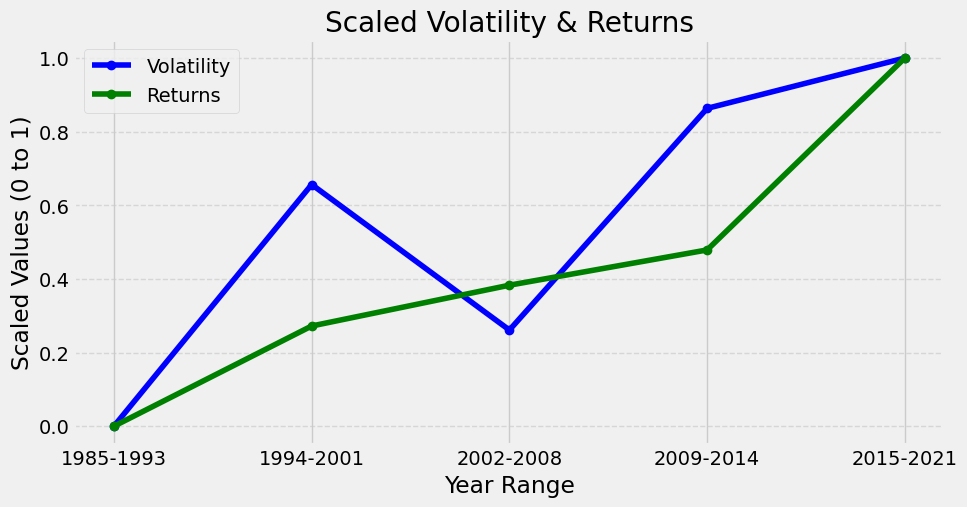

In [184]:
std = [81.29431989539988, 352.4023389472756, 189.1365529688897, 437.84225758861453, 494.34155616854997]
mean = [318.7554709990566, 933.6120818458334, 1184.0263940546665, 1400.4174650132531, 2578.4877154324327]
x = ["1985-1993", "1994-2001", "2002-2008", "2009-2014", "2015-2021"]


def min_max_scale(values):
    min_val = min(values)
    max_val = max(values)
    return [(v - min_val) / (max_val - min_val) for v in values]

scaled_std = min_max_scale(std)
scaled_mean = min_max_scale(mean)

plt.figure(figsize=(10, 5))

plt.plot(x, scaled_std, marker='o', label='Volatility', color='blue')
plt.plot(x, scaled_mean, marker='o', label='Returns', color='green')


plt.title("Scaled Volatility & Returns")
plt.xlabel("Year Range")
plt.ylabel("Scaled Values (0 to 1)")


plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 95% CI for phase duration is 6.309 – 6.491

## Price around different phases

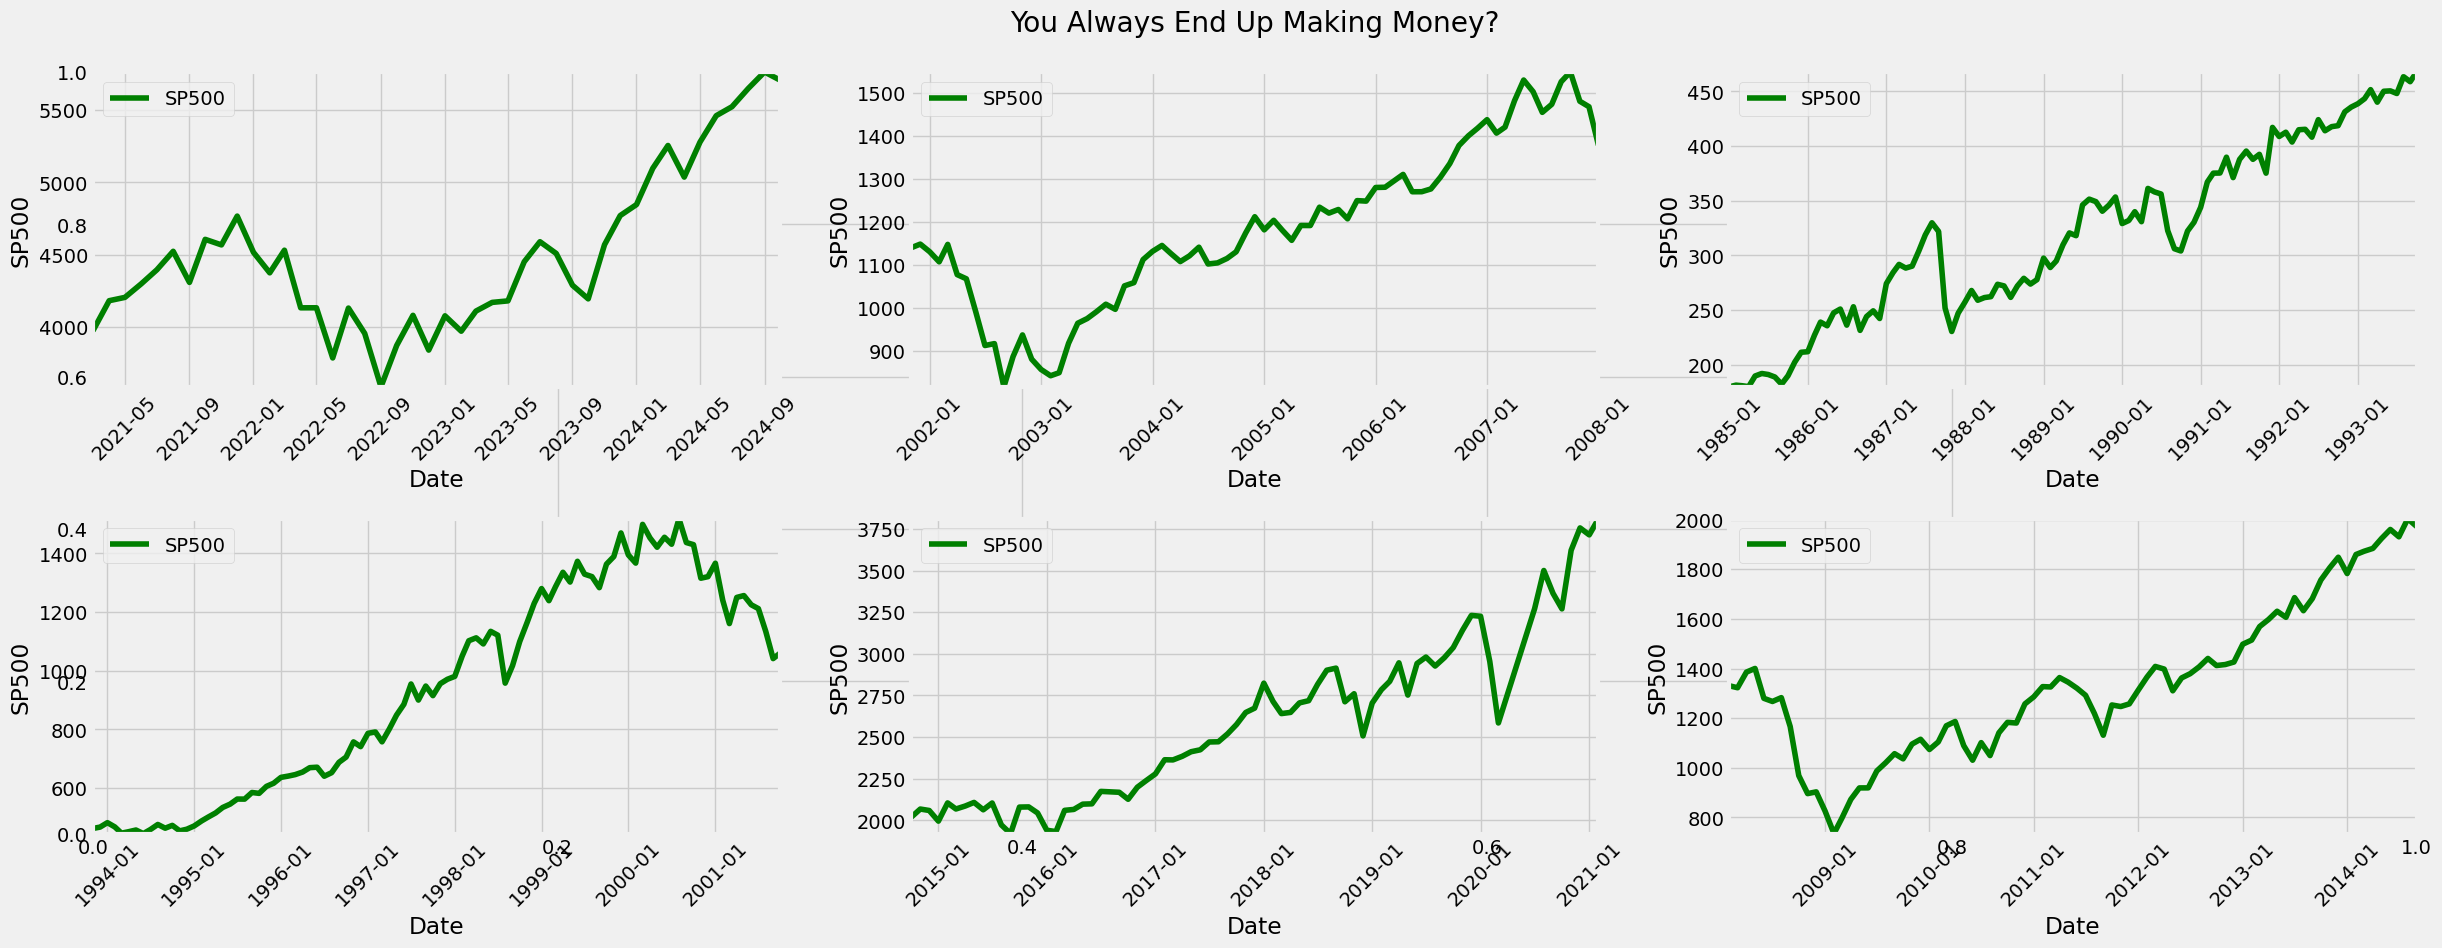

In [149]:
import matplotlib.dates as mdates

datasets = [phase_1, phase_2, phase_3, phase_4, phase_5, phase_6.head(80)]
titles = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6']

fig = plt.figure(figsize=(25, 10)) 
plt.title('You Always End Up Making Money?\n') 

for i, (data, title) in enumerate(zip(datasets, titles)):
    ax = fig.add_subplot(2, 3, i + 1)  
    ax.plot(data['Date'], data['SP500'], label='SP500', color='green')
    ax.set_xlabel('Date')
    ax.set_ylabel('SP500')
    ax.grid(True)
    ax.legend()
    
    ax.set_xlim(data['Date'].min(), data['Date'].max())  
    ax.set_ylim(data['SP500'].min(), data['SP500'].max())  

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
    ax.xaxis.set_major_locator(mdates.AutoDateLocator()) 
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  


plt.tight_layout()
plt.show()

In [35]:
def lag_analysis(dataframe, target_column, lag_range):
    lagged_correlations = {}
    data = dataframe.copy()

    for col in data.columns:
        if col != 'Date':  # Skip the Date column
            correlations = []
            for lag in range(1, lag_range + 1):
                data[f'{col}_lag{lag}'] = data[col].shift(lag)
                corr = data[target_column].corr(data[f'{col}_lag{lag}'])
                correlations.append(corr)
            lagged_correlations[col] = correlations

    return lagged_correlations

In [36]:
datasets = [phase_1,phase_2,phase_3,phase_4,phase_5,phase_6]

1


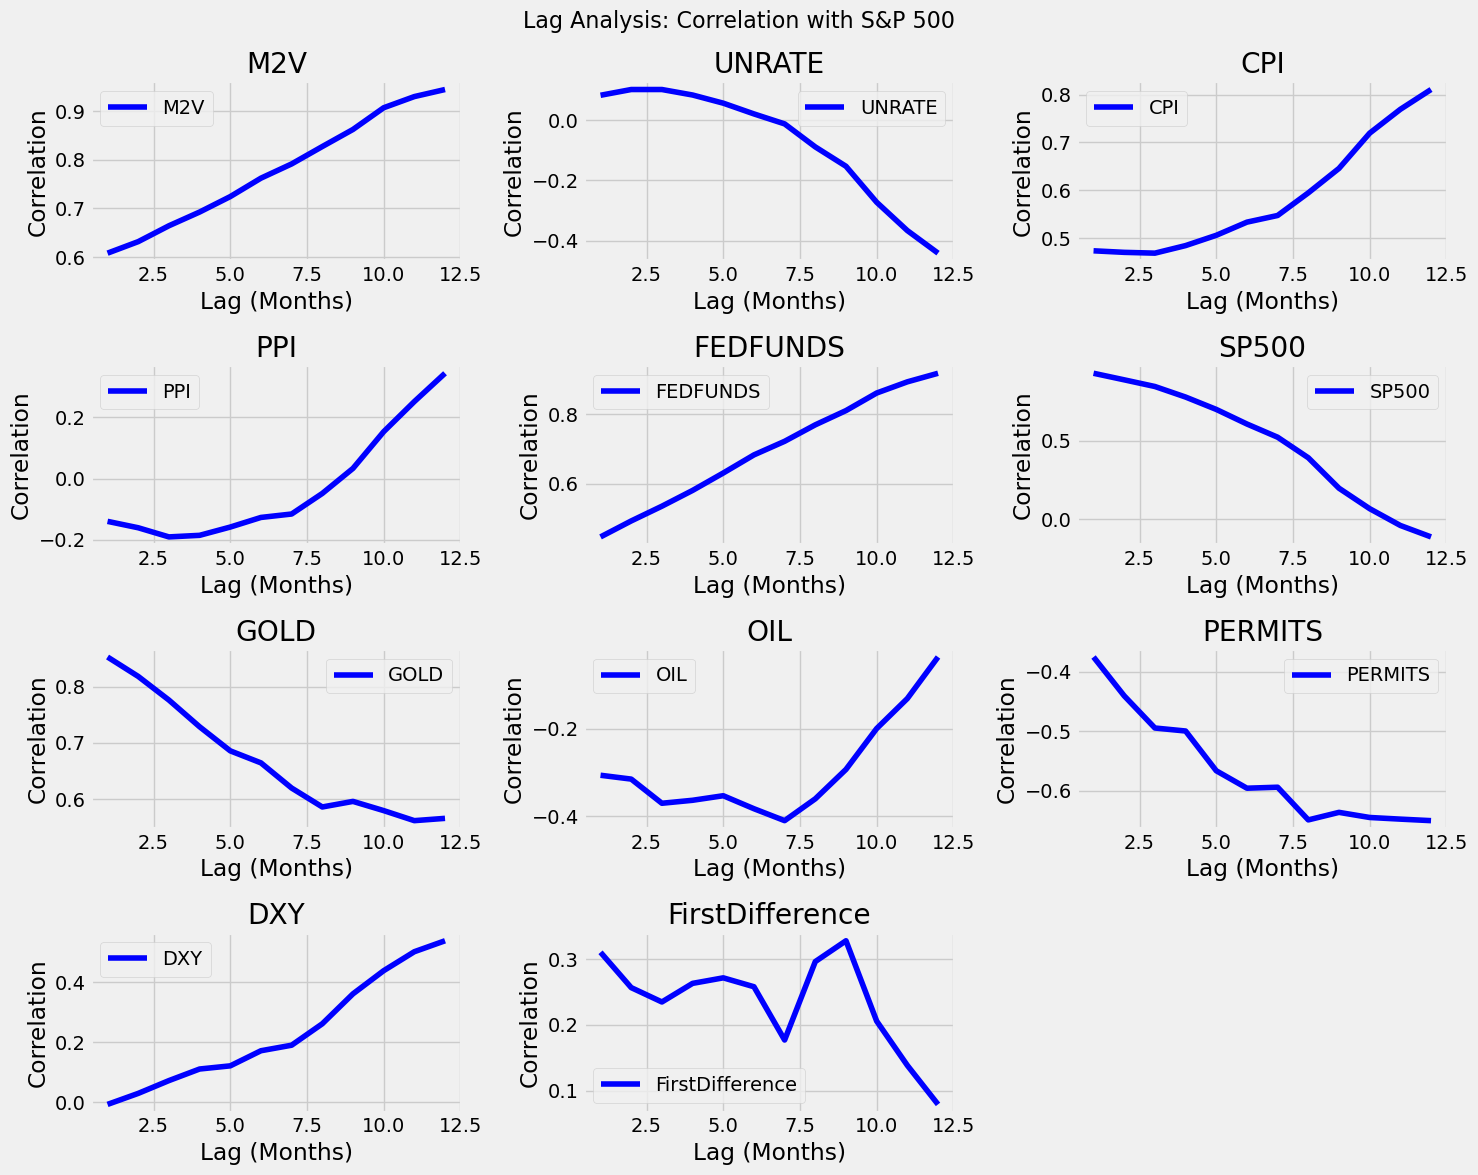

2


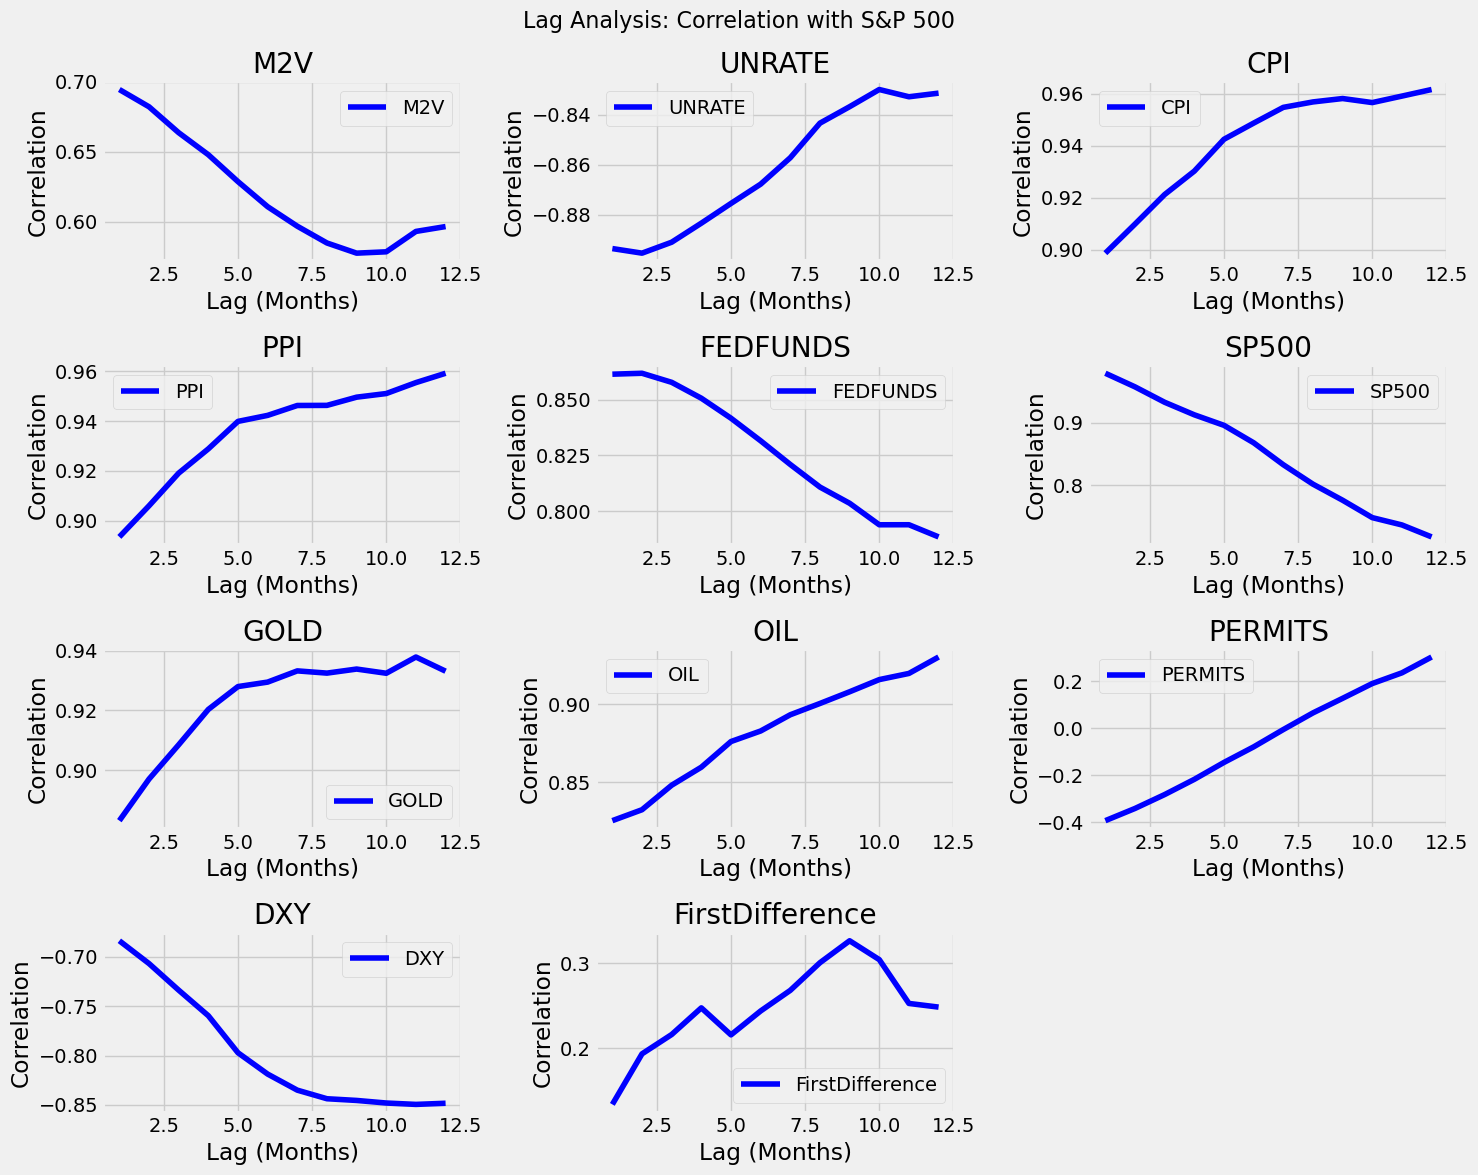

3


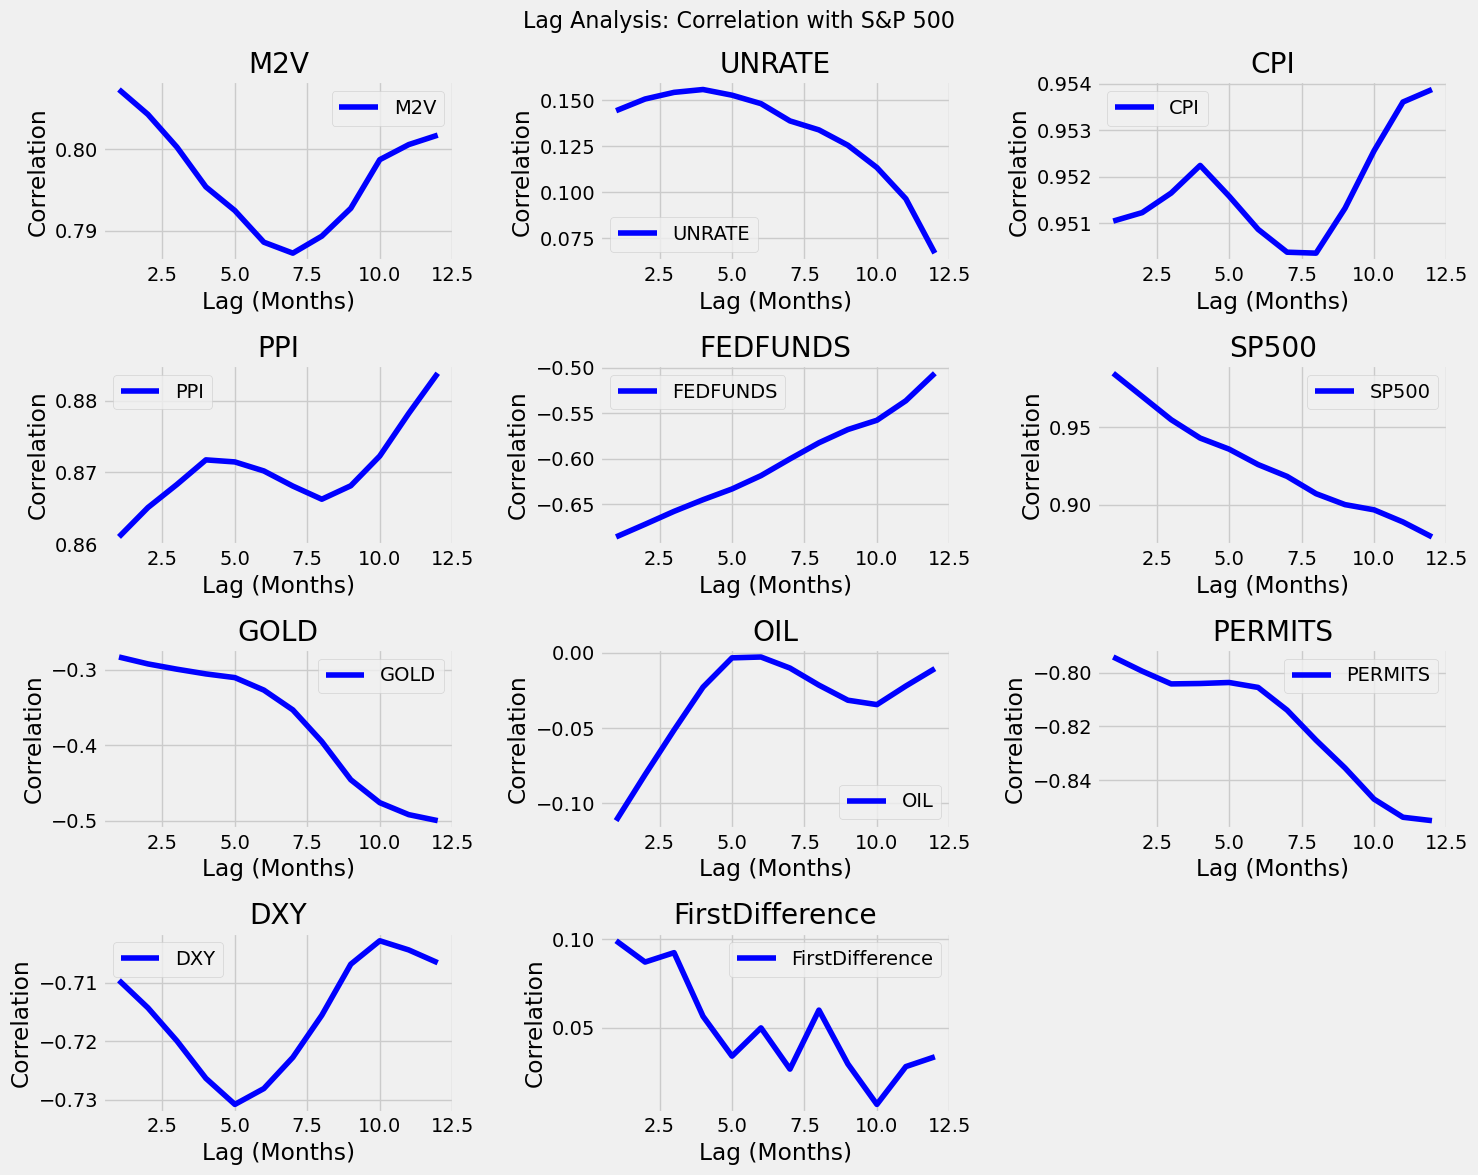

4


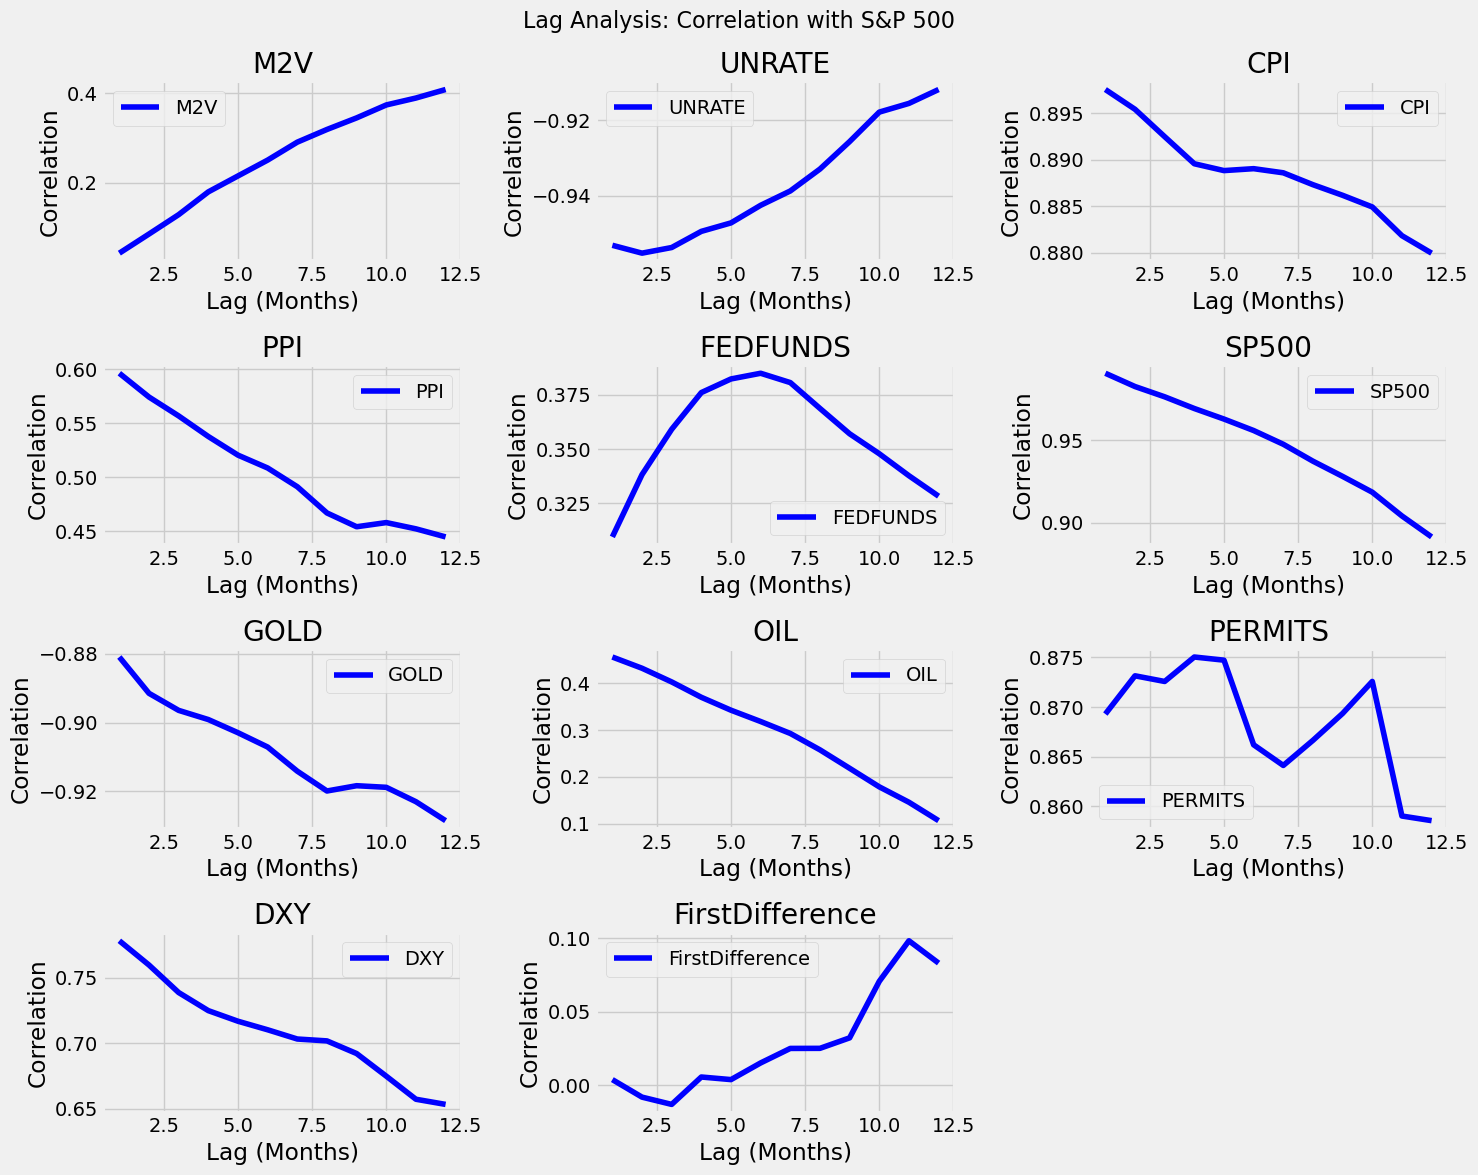

5


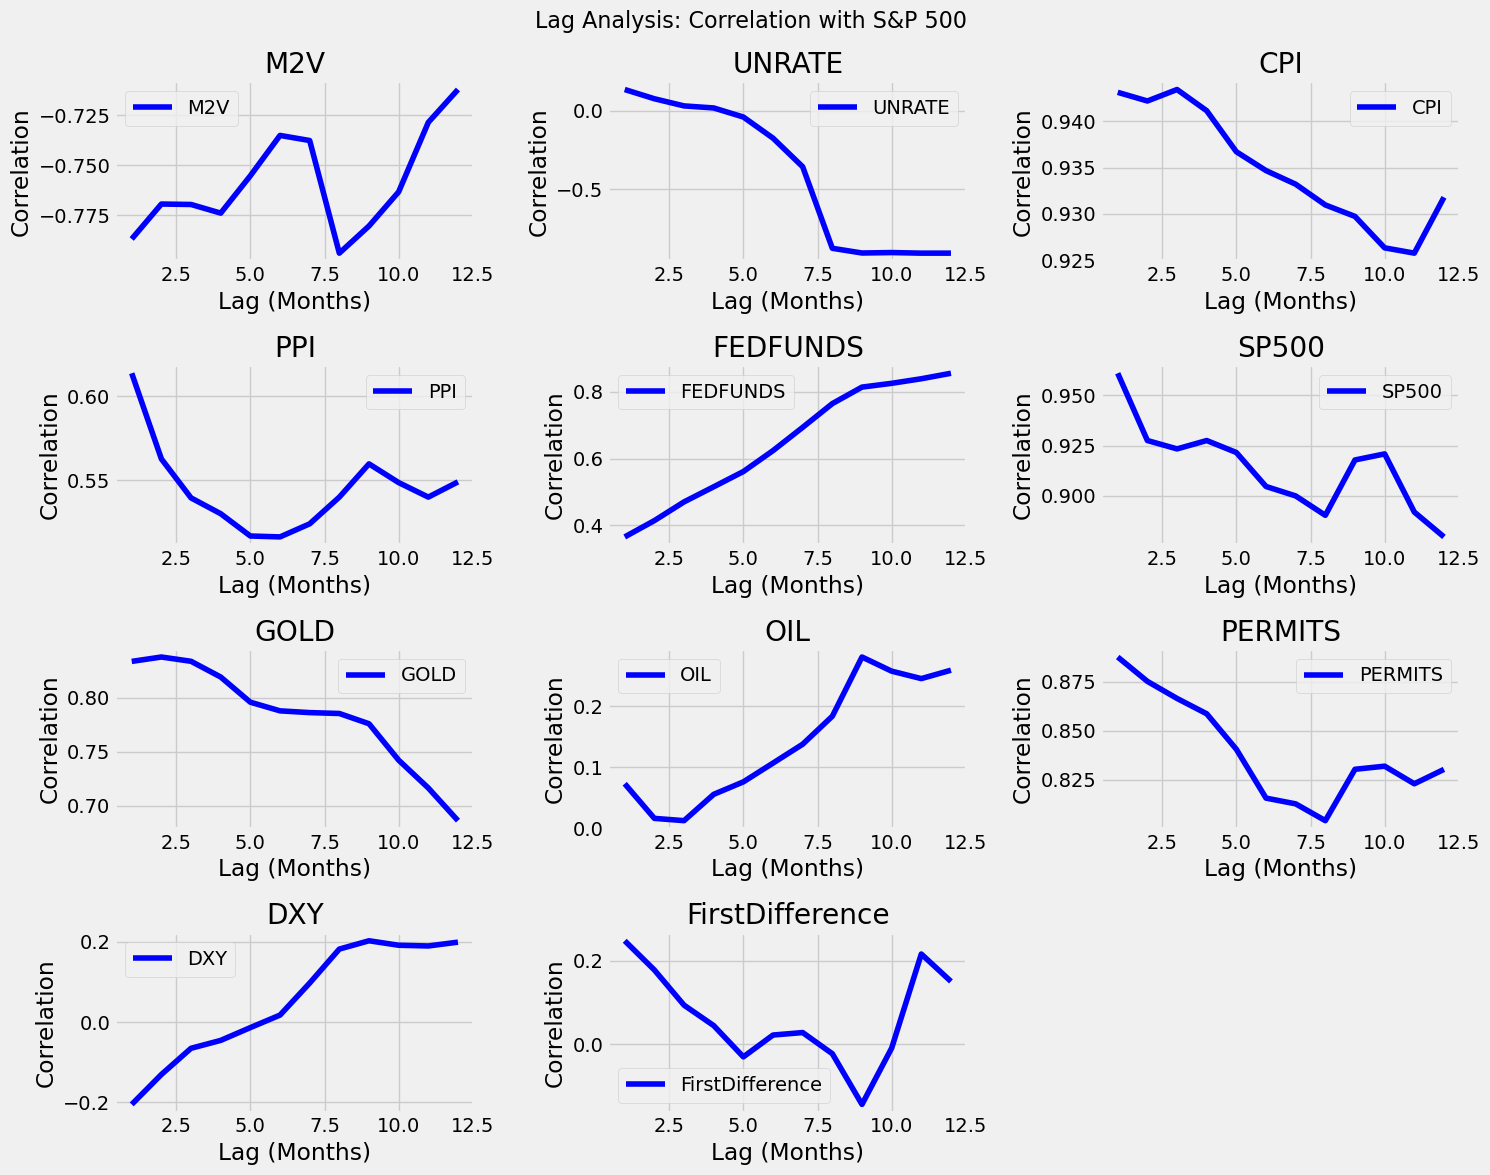

6


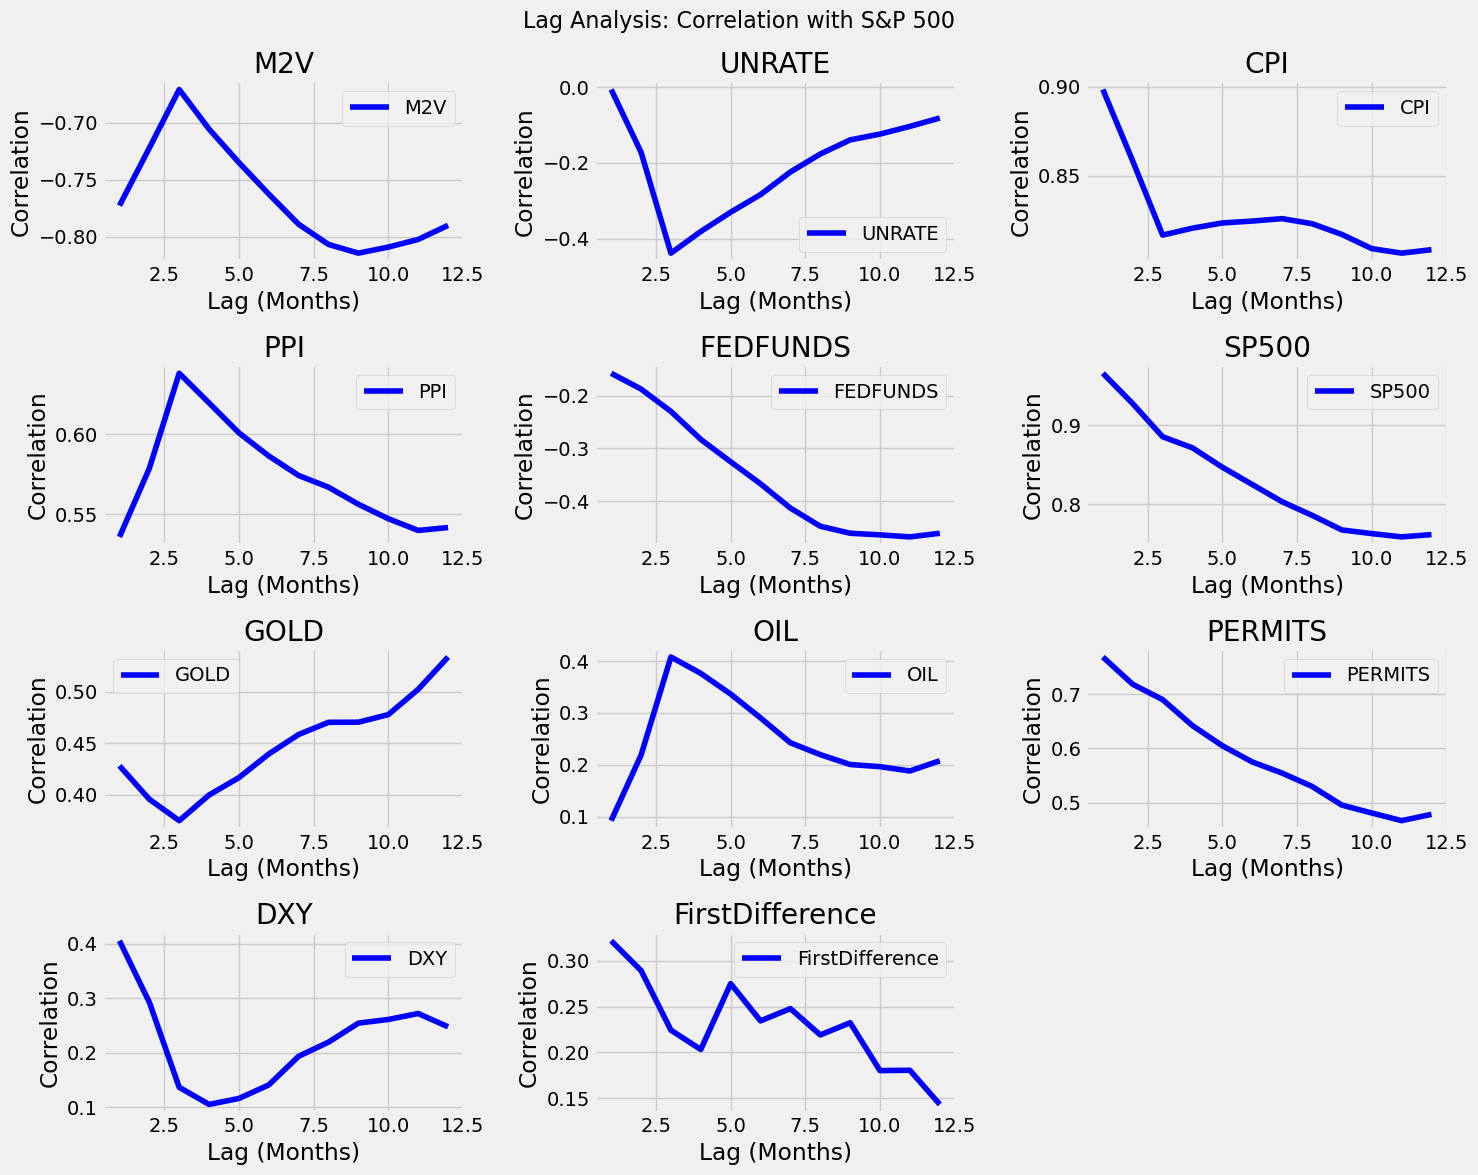

In [37]:
import matplotlib.pyplot as plt

rows = 4
cols = 3
j = 1
for x in datasets:
    lag_range = 12
    lagged_correlations = lag_analysis(x, target_column='SP500', lag_range=lag_range)
    
    print(j)
    # Plot the results using subplots
    features = list(lagged_correlations.keys())
    num_features = len(features)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
    fig.suptitle('Lag Analysis: Correlation with S&P 500', fontsize=16)

    for i, (feature, correlations) in enumerate(lagged_correlations.items()):
        if i >= rows * cols:  # Check if the number of features exceeds available subplots
            break
        row, col = divmod(i, cols)
        ax = axes[row, col]
        ax.plot(range(1, lag_range + 1), correlations, label=feature, color='b')
        ax.set_title(f'{feature}')
        ax.set_xlabel('Lag (Months)')
        ax.set_ylabel('Correlation')
        ax.grid(True)
        ax.legend()

    # Hide unused subplots (if any)
    for i in range(num_features, rows * cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()
    
    j += 1  # Increment j


In [38]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [39]:
feature_lag_mapping = {
    'M2V': 12,       # Lag 2 for M2 velocity
    'UNRATE': 3,    # Lag 1 for Unemployment rate
    'CPI': 12,       # Lag 4 for CPI
    'PPI': 12,      # Lag 12 for PPI
    'FEDFUNDS': 12,  # Lag 8 for Fed Funds Rate
    'PERMITS': 1,   # Lag 2 for Building Permits
    'DXY': 12,       # Lag 4 for Dollar Index
    'GOLD': 1,      # Lag 1 for Gold
    'OIL': 12,      # Lag 12 for Oil
    'SP500': 1      # Lag 1 for S&P 500
}


def apply_lags(data, lag_mapping):
    lagged_data = data.copy()  
    for feature, lag in lag_mapping.items():
        for i in range(1, lag + 1):  
            lagged_data[f'{feature}_lag_{i}'] = data[feature].shift(i)  
    return lagged_data


df_lagged = apply_lags(phase_1, feature_lag_mapping)
df_lagged = df_lagged.dropna().reset_index(drop=True)
df_lagged = df_lagged[['Date','SP500','FirstDifference','M2V_lag_12','UNRATE_lag_3','CPI_lag_12',
                       'PPI_lag_12','FEDFUNDS_lag_12','PERMITS_lag_1','DXY_lag_12','GOLD_lag_1',
                       'OIL_lag_12','SP500_lag_1']]

In [40]:
df_lagged.tail()

,Date,SP500,FirstDifference,M2V_lag_12,UNRATE_lag_3,CPI_lag_12,PPI_lag_12,FEDFUNDS_lag_12,PERMITS_lag_1,DXY_lag_12,GOLD_lag_1,OIL_lag_12,SP500_lag_1
27,2024-06-01,5460.479980,61.819825,1.322,3.8,305.109,253.860,5.08,1399.0,102.910004,2335.5,70.25,5277.509766
28,2024-07-01,5522.299805,126.100097,1.349,3.9,305.691,253.835,5.12,1454.0,101.860001,2352.1,76.07,5460.479980
29,2024-08-01,5648.399902,114.080078,1.349,4.0,307.026,257.680,5.33,1406.0,103.620003,2326.3,81.39,5522.299805
30,2024-09-01,5762.479980,-57.029785,1.349,4.1,307.789,258.934,5.33,1470.0,106.169998,2395.3,89.43,5648.399902
31,2024-10-01,5705.450195,0.000000,1.368,4.3,307.671,255.192,5.33,1425.0,106.660004,2468.0,85.64,5762.479980


## Data Split and Scaling

In [41]:
features = [features for features in df_lagged.columns if features not in ['SP500','Date']]

In [42]:
X = df_lagged.drop(columns=['SP500','Date'])
y = df_lagged['SP500']

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [43]:
X.tail()

,FirstDifference,M2V_lag_12,UNRATE_lag_3,CPI_lag_12,PPI_lag_12,FEDFUNDS_lag_12,PERMITS_lag_1,DXY_lag_12,GOLD_lag_1,OIL_lag_12,SP500_lag_1
27,61.819825,1.322,3.8,305.109,253.860,5.08,1399.0,102.910004,2335.5,70.25,5277.509766
28,126.100097,1.349,3.9,305.691,253.835,5.12,1454.0,101.860001,2352.1,76.07,5460.479980
29,114.080078,1.349,4.0,307.026,257.680,5.33,1406.0,103.620003,2326.3,81.39,5522.299805
30,-57.029785,1.349,4.1,307.789,258.934,5.33,1470.0,106.169998,2395.3,89.43,5648.399902
31,0.000000,1.368,4.3,307.671,255.192,5.33,1425.0,106.660004,2468.0,85.64,5762.479980


## Feature Scaling

In [44]:
scaler = StandardScaler()
target = StandardScaler()


target.fit(np.array(y_train).reshape(-1, 1))
scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


y_train = target.transform(np.array(y_train).reshape(-1, 1))
y_test = target.transform(np.array(y_test).reshape(-1, 1))

In [45]:
X_train = pd.concat([df_lagged['SP500'].reset_index(drop=True),pd.DataFrame(scaler.transform(X_train),columns=features)],axis=1)

In [46]:
X_train.head()

,SP500,FirstDifference,M2V_lag_12,UNRATE_lag_3,CPI_lag_12,PPI_lag_12,FEDFUNDS_lag_12,PERMITS_lag_1,DXY_lag_12,GOLD_lag_1,OIL_lag_12,SP500_lag_1
0,4530.410156,-1.831169,-0.765490,1.769076,-1.751671,-1.978805,-0.777155,2.095554,-0.991909,-0.599082,-1.390296,0.358384
1,4131.930176,-0.087434,-0.971932,2.449490,-1.567918,-1.817149,-0.777155,2.238879,-1.295975,-0.214055,-1.431688,0.807943
2,4132.149902,-1.605013,-0.971932,1.088662,-1.387204,-1.426946,-0.783081,1.906969,-1.520517,0.677842,-1.197588,-0.336940
3,3785.379883,1.420089,-0.971932,-0.272166,-1.176104,-1.203973,-0.771230,0.979132,-1.115095,0.542351,-0.776208,-0.336309
4,4130.290039,-0.855036,-0.951288,0.408248,-1.065785,-1.039530,-0.759380,1.228064,-1.157197,-0.292035,-0.700888,-1.332623


## Initial Model Buiding

In [227]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train_scaled, y_train, epochs=45, batch_size=32, validation_data=(X_test_scaled, y_test))


loss = model.evaluate(X_test_scaled, y_test)
print(f'Model Loss: {loss}')


predictions = model.predict(X_test_scaled)

Epoch 1/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9987 - val_loss: 10.2041
Epoch 2/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.9309 - val_loss: 9.4488
Epoch 3/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.8722 - val_loss: 8.7513
Epoch 4/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.8231 - val_loss: 8.1052
Epoch 5/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.7781 - val_loss: 7.5063
Epoch 6/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.7371 - val_loss: 6.9575
Epoch 7/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.6992 - val_loss: 6.4513
Epoch 8/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.6617 - val_loss: 5.9802
Epoch 9/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.6262 - val_loss: 5.5888
Epoch 10/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.5934 - val_loss: 5.3114
Epoch 11/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.5643 - val_loss: 5.0767
Epoch 12/45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.5375 - val_loss: 4.84

## Initial Predictions & R squared

In [48]:
target.inverse_transform(predictions)

array([[5033.2017],
       [5232.2866],
       [5224.6724],
       [5247.2266],
       [5381.1904],
       [5413.9375],
       [5595.971 ]], dtype=float32)

In [49]:
target.inverse_transform(y_test)

array([[5035.689941],
       [5277.509766],
       [5460.47998 ],
       [5522.299805],
       [5648.399902],
       [5762.47998 ],
       [5705.450195]])

In [228]:
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')

R^2 Score: 0.6312855463998615


## Model Tuning

In [50]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [51]:
def build_model(hp):
    model = Sequential()

    
    for i in range(hp.Int('num_layers', 2, 5)):  
        
        model.add(Dense(hp.Int(f'num_units_{i}', min_value=8, max_value=128, step=8),
                        activation='relu'))

    
    model.add(Dense(1))

    
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
                  loss='mean_squared_error')
    
    epochs = hp.Int('epochs', min_value=20, max_value=100, step=5)

    return model

In [52]:
tuner = kt.Hyperband(
    build_model, 
    objective='val_loss',  
    max_epochs=30,  
    hyperband_iterations=2,  
    directory='loss',  
    project_name='stock_market_tuning'
)


tuner.search(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=32)

Reloading Tuner from loss\stock_market_tuning\tuner0.json


In [225]:
best_model = tuner.get_best_models(num_models=15)[10]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


print("Best hyperparameters:", best_hyperparameters.values)

loss = best_model.evaluate(X_test_scaled, y_test)
print(f'Model Loss: {loss}')


predictions = best_model.predict(X_test_scaled)

Best hyperparameters: {'num_layers': 5, 'num_units_0': 64, 'num_units_1': 72, 'learning_rate': 0.007592175016682904, 'epochs': 65, 'num_units_2': 112, 'num_units_3': 40, 'num_units_4': 8, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.0425
Model Loss: 0.04245270416140556
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


## Predictions & R Square

In [55]:
target.inverse_transform(predictions)

array([[5089.971 ],
       [5236.091 ],
       [5501.4033],
       [5526.24  ],
       [5568.409 ],
       [5671.8945],
       [5787.5703]], dtype=float32)

In [226]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')


R^2 Score: 0.8811165321700758


## Errors

Epoch 1/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1238 - val_loss: 14.0268
Epoch 2/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 1.1043 - val_loss: 0.9003
Epoch 3/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0989 - val_loss: 0.6950
Epoch 4/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1826 - val_loss: 2.4468
Epoch 5/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.3451 - val_loss: 3.1282
Epoch 6/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.3903 - val_loss: 3.0005
Epoch 7/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.3663 - val_loss: 2.5416
Epoch 8/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.3143 - val_loss: 1.8979
Epoch 9/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.2484 - val_loss: 1.1847
Epoch 10/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.1817 - val_loss: 0.5069
Epoch 11/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1191 - val_loss: 0.0792
Epoch 12/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0800 - val_loss: 0.1292


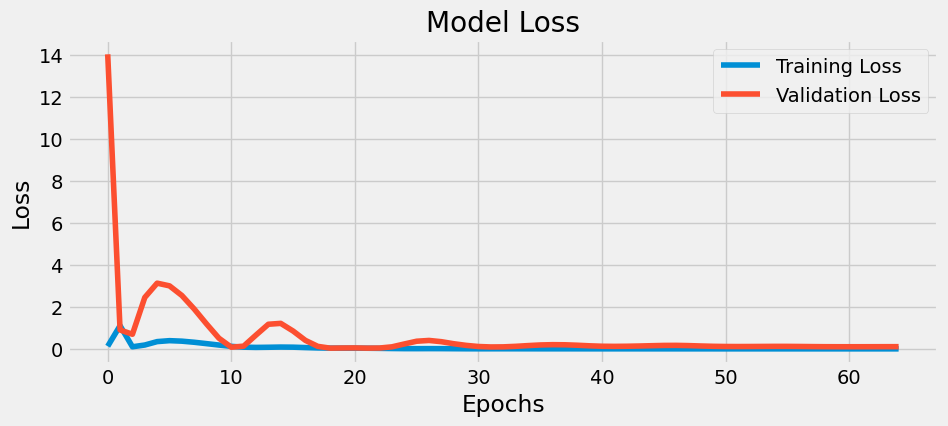

In [58]:
history = best_model.fit(
    X_train_scaled, 
    y_train, 
    validation_data=(X_test_scaled, y_test), 
    epochs=best_hyperparameters['epochs'],  
    batch_size=32
)


def plot_loss(history):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)



## Final Model Predictions Visuals

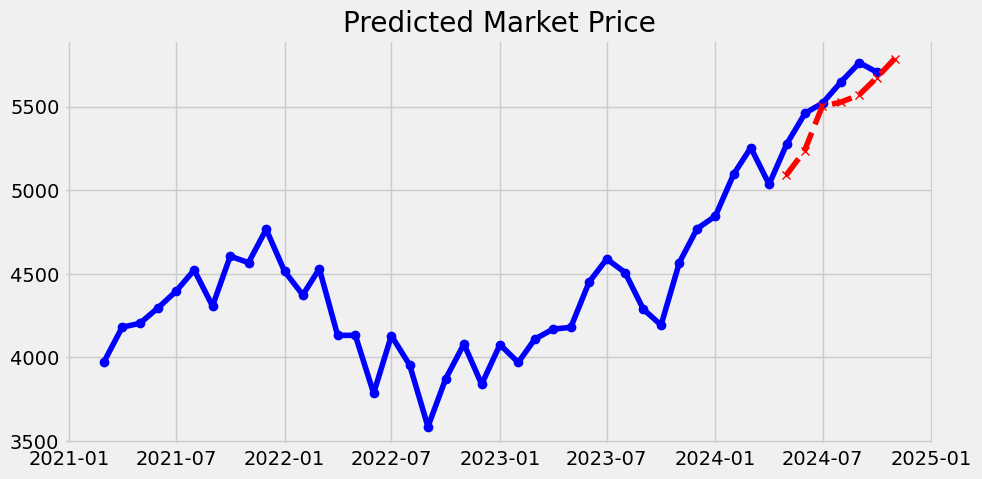

In [59]:
plt.figure(figsize=(10, 5))
plt.title('Predicted Market Price')
dates = pd.date_range(start='2024-04-01', periods=len(target.inverse_transform(predictions)), freq='M')
plt.plot(phase_1['Date'],phase_1['SP500'], label='Actual Prices', color='blue', linestyle='-', marker='o')
plt.plot(dates,target.inverse_transform(predictions), label='Predicted Prices', color='red', linestyle='--', marker='x')

## Visualising Hyper Parameters

In [60]:
best_trials = tuner.oracle.get_best_trials(num_trials=50)

In [61]:
hyperparams = []
performance = []


for trial in best_trials:

    trial_hyperparams = trial.hyperparameters.values
    hyperparams.append(trial_hyperparams)  
    
    
    performance.append(trial.score)


hyperparams = np.array(hyperparams)
performance = np.array(performance)

In [62]:
hyperparams_list = [dict(trial) for trial in hyperparams]
df_hyperparams = pd.DataFrame(hyperparams_list)

In [63]:
df_hyperparams['performance'] = performance
df_hyperparams.head()

,num_layers,num_units_0,num_units_1,learning_rate,epochs,num_units_2,num_units_3,num_units_4,tuner/epochs,tuner/initial_epoch,tuner/bracket,tuner/round,tuner/trial_id,performance
0,5,64,72,0.007592,65,112,40,8,10,0,1,0,NaN,0.024780
1,5,96,56,0.007512,85,104,56,16,4,2,3,1,0033,0.024858
2,2,104,104,0.002454,60,64,56,64,30,10,3,3,0047,0.025135
3,4,48,32,0.003977,30,88,32,32,10,4,3,2,0133,0.027891
4,4,48,32,0.003977,30,88,32,32,30,10,3,3,0138,0.031119


Text(0, 0.5, 'Scaled Model Loss')

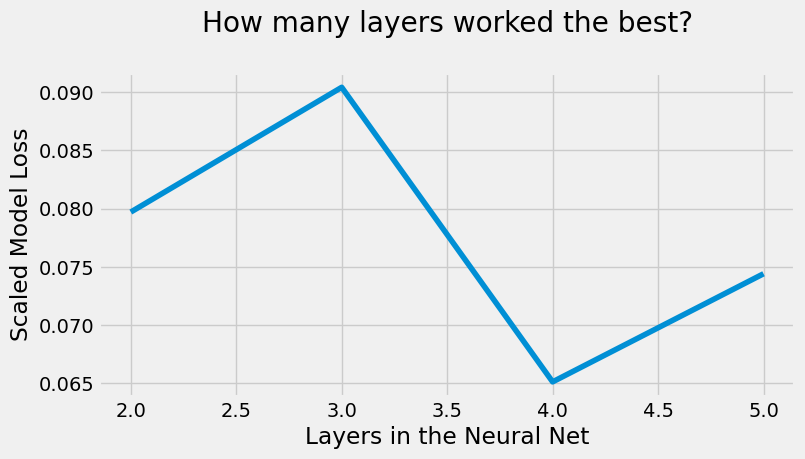

In [81]:
plt.figure(figsize=(8,4))
plt.title('How many layers worked the best?\n')
df_hyperparams.groupby('num_layers')['performance'].median().plot()
plt.xlabel('Layers in the Neural Net')
plt.ylabel('Scaled Model Loss')


Text(0, 0.5, 'Scaled Model Loss')

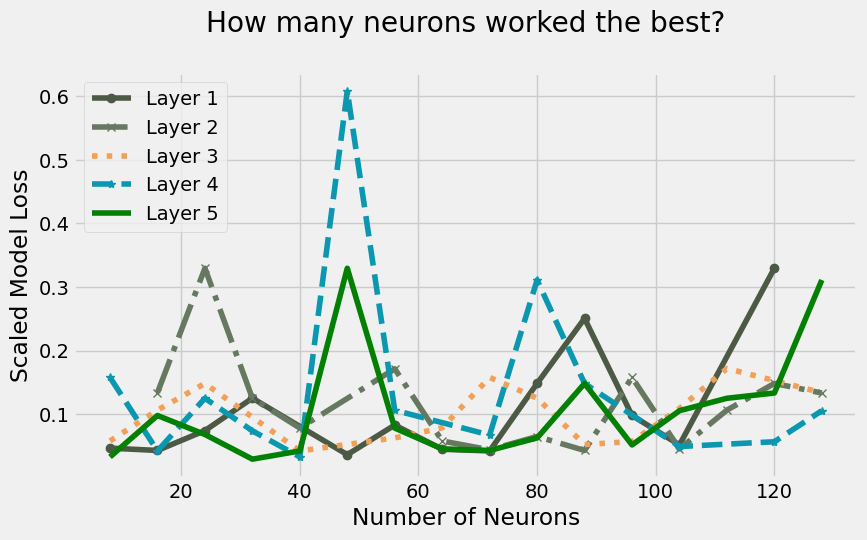

In [107]:
plt.figure(figsize=(9,5))
plt.title('How many neurons worked the best?\n')
df_hyperparams.groupby('num_units_0')['performance'].median().plot(color='#4B5945' ,linestyle='-', marker='o',label='Layer 1')
df_hyperparams.groupby('num_units_1')['performance'].median().plot(color='#66785F' ,linestyle='dashdot', marker='x',label='Layer 2')
df_hyperparams.groupby('num_units_2')['performance'].median().plot(color='#F29F58' ,linestyle=':', marker='',label='Layer 3')
df_hyperparams.groupby('num_units_3')['performance'].median().plot(color="#0A97B0" ,linestyle='dashed', marker='*',label='Layer 4')
df_hyperparams.groupby('num_units_4')['performance'].median().plot(color='green',label='Layer 5')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xlabel('Number of Neurons')
plt.ylabel('Scaled Model Loss')

Text(0, 0.5, 'Scaled Model Loss')

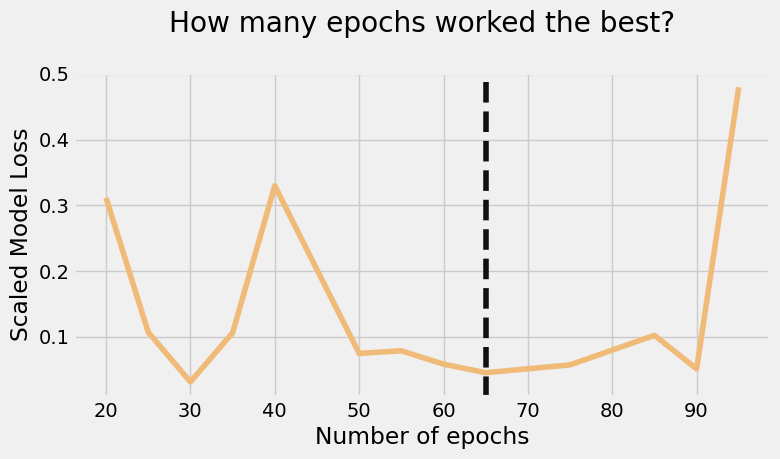

In [116]:
plt.figure(figsize=(8,4))
plt.title('How many epochs worked the best?\n')
df_hyperparams.groupby('epochs')['performance'].median().plot(color='#F0BB78')
plt.axvline(x=65,linestyle='dashed',color='#131010')
plt.xlabel('Number of epochs')
plt.ylabel('Scaled Model Loss')

## Model Dump

In [64]:
import pickle
#pickle.dump(model, open('Best_Model.sav', 'wb'))